<a href="https://colab.research.google.com/github/shubham7120k/StockAnalysis/blob/master/StockAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from itertools import zip_longest
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
import numpy as np
import math
import matplotlib.pyplot as plt


In [0]:
df= pd.read_csv('HDFCBANK.NS.csv')
def clean_data(df):
  ls=[]
  f=0
  for cols in df:
    i=0
    if f==0:
      f=1
      continue
    #print(cols);
    for index,rows in df.iterrows():
      dat = rows[cols]
      if math.isnan(dat):
        ls.append(i)
      if isinstance(dat, (int, float)):
        pass
      else:
        ls.append(i)
      i=i+1
  df.drop(ls)    

In [63]:
clean_data(df);
pd.to_numeric(df['Close'], errors='coerce')

0       526.025024
1       530.474976
2       530.400024
3       524.299988
4       534.450012
          ...     
977    1239.500000
978    1256.650024
979    1263.699951
980    1255.599976
981    1264.750000
Name: Close, Length: 982, dtype: float64

In [0]:
closePrice = df.Close;
batchSize = 10;
X = []
Y = []

In [0]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [0]:
X,Y = split_sequence(closePrice,batchSize);


[1237.699951 1242.5      1248.349976 1230.349976 1240.050049 1236.849976
 1239.5      1256.650024 1263.699951 1255.599976] 1264.75


In [0]:
def Model(n_steps,n_features):
  model = Sequential()
  model.add(LSTM(50, activation='relu',return_sequences=True, input_shape=(n_steps, n_features)))
  model.add(LSTM(50, activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  return model

In [0]:
X=np.asarray(X)
n_features=1;
X=X.reshape((X.shape[0],X.shape[1],n_features))
Y = np.asarray(Y)

model = Model(batchSize,n_features)

In [141]:

model.fit(X, Y, epochs=200)

Epoch 1/200
972/972 [==============================] - 3s 3ms/step - loss: 381713.8243
Epoch 2/200
972/972 [==============================] - 1s 523us/step - loss: 4099.5678
Epoch 3/200
972/972 [==============================] - 1s 541us/step - loss: 709.2376
Epoch 4/200
972/972 [==============================] - 1s 526us/step - loss: 516.3690
Epoch 5/200
972/972 [==============================] - 1s 531us/step - loss: 508.6137
Epoch 6/200
972/972 [==============================] - 1s 548us/step - loss: 511.0548
Epoch 7/200
972/972 [==============================] - 1s 558us/step - loss: 499.8343
Epoch 8/200
972/972 [==============================] - 1s 530us/step - loss: 492.9827
Epoch 9/200
972/972 [==============================] - 1s 530us/step - loss: 491.3543
Epoch 10/200
972/972 [==============================] - 0s 511us/step - loss: 491.0507
Epoch 11/200
972/972 [==============================] - 1s 518us/step - loss: 475.1607
Epoch 12/200
972/972 [============================

In [157]:

yy = []
for xx in X:
  xxx = xx
  xxx = xxx.reshape((1,batchSize,1));
  yy.append(model.predict(xxx));


xxx = X[-1]
xxx[-1]=Y[-1]
xxx = xxx.reshape((1,batchSize,1));
yy.append(model.predict(xxx))
yy = np.asarray(yy)
print(yy.shape)
yy = yy.reshape(yy.shape[0]);



(973, 1, 1)


[ 536.3065   537.9514   538.4415   538.9762   541.93054  541.82806
  541.797    542.6484   544.18085  546.0272   545.2589   544.007
  541.3827   538.6968   535.4902   535.10474  533.7135   534.6214
  536.36896  536.57513  539.6931   541.9771   544.0679   545.02386
  544.05096  544.1495   543.86395  545.24005  545.4879   546.0334
  546.1704   545.60376  545.2904   543.3994   539.40125  537.7847
  537.1372   535.07184  534.7529   532.8106   530.8083   529.89575
  526.3315   523.37445  521.3279   522.07446  521.4034   523.7852
  526.0041   527.93695  528.55975  530.17303  532.5247   532.0837
  529.6781   527.0951   525.10266  520.8605   513.0585   506.566
  500.0695   494.27823  494.1231   495.1906   496.19754  497.3779
  497.8998   495.2499   491.78482  488.1238   491.58817  501.52335
  504.4185   506.4043   510.12988  514.8971   516.86584  517.7157
  518.23596  520.1454   520.54736  521.739    521.65027  522.22906
  524.0461   525.3078   529.4695   532.83704  534.14154  534.60376
  536.

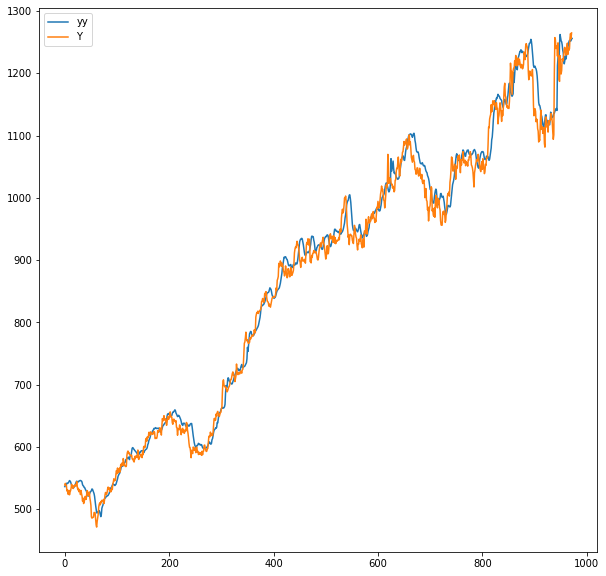

In [159]:
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(yy,label='yy')
plt.plot(Y,label='Y')
plt.legend()
print(yy);